Товарищи, мы все уже великие специалисты в нейронных сетях, поэтому пришло время показать это миру. Мы будем решать конкурс от роснефти по сегментации изображений. У нас будут изображения с трехмерного куба, где надо найти различные области на этих снимках. А дальше уже смотрите сами :)

Более подробно о данном конкурсе можно посмотреть вот тута :
[ссылочка](https://boosters.pro/championship/seismic_challenge/overview)


В рамках данной домашки попробуем вспомнить все, что нам мы делали.

Дальше будет о подгрузке данных и небольшие направления деятельности, но в основном ваше фантазия решает этот конкурс :)


In [325]:
import tensorflow as tf
# import tensorflow_hub as hub


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline




import pandas as pd
import numpy as np
import cv2 # подгрузка и работа с данными
import os
import tqdm # счетчик и красивый прогресс бар

IMAGE_PATH = '/storage/Study/DBO/dl/rosneft_challenge/rosneft_challenge/make_rofneft_predict/data/train/images/'
MASK_PATH = '/storage/Study/DBO/dl/rosneft_challenge/rosneft_challenge/make_rofneft_predict/data/train/train.csv'
TEST_PATH = '/storage/Study/DBO/dl/rosneft_challenge/rosneft_challenge/make_rofneft_predict/data/test/images/'
SAMPLE_PATH = '/storage/Study/DBO/dl/rosneft_challenge/rosneft_challenge/make_rofneft_predict/data/sample_submission.csv'

def rle2mask(mask_rle, shape):
    # эта функция взята с конкурса и я её оставил как есть
    """
    mask_rle: run-length as string formated (start length)ы
    shape: (width,height) of array to return
    Returns numpy array, 1 - mask, 0 - background
    """
    if mask_rle != mask_rle:
        return np.zeros_like(shape)

    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape).T

class TrainDataset():
    # немного переписанный загрузчик данных опять же с конкурса
    def __init__(self, image_dir, train):
        self.image_dir = image_dir
        self.train = train
        self.image_uses = []

    def __getitem__(self, index):
        
        
        img_name = self.train.iloc[index]['ImageId']
        if img_name in self.image_uses:
            return 'hups'
        else:
            self.image_uses.append(img_name)
            path = os.path.join(self.image_dir, img_name)
            img = cv2.imread(path)
            img = cv2.resize(img,(384,384))

            ce_mask = [
                (i + 1) * rle2mask(rle, shape=(img.shape[0], img.shape[1])) \
                    for i, rle in enumerate(self.train[self.train['ImageId']==img_name]['EncodedPixels'])
            ]
            ce_mask = np.sum(ce_mask, axis=0, dtype=np.float32)


            result = {
                'image':img, 
                'mask': ce_mask,
                'pick_name':img_name
            }
            return result
    
    def __len__(self, ):
        return len(self.train)
    
train = pd.read_csv(MASK_PATH)
train_dataset = TrainDataset(
    image_dir=IMAGE_PATH, 
    train=train)


Кстати, посмотрев на данные, какие особенности данных мы видим?

In [288]:
x_images = []
y_images = []
for i in train_dataset:
    if type(i)==str:
        pass
    else:
        x_images.append(i['image'])
        y_images.append(i['mask']) 
            

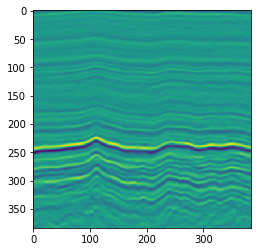

In [67]:
plt.imshow(x_images[894])

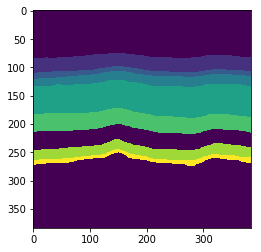

In [7]:
plt.imshow(y_images[895])

In [56]:
np.delete(x_images[0], np.s_[1:], axis=2).squeeze().astype(dtype=float)

array([[139., 140., 141., ...,  85.,  84.,  84.],
       [147., 149., 149., ...,  73.,  73.,  73.],
       [149., 149., 149., ...,  81.,  81.,  80.],
       ...,
       [125., 124., 123., ..., 112., 113., 113.],
       [125., 124., 123., ..., 109., 110., 111.],
       [126., 124., 123., ..., 105., 107., 107.]])

In [228]:
for i in range(len(x_images)):
    x_images[i] = np.delete(x_images[i], np.s_[1:], axis=2).squeeze().astype(dtype=float)

In [6]:
# Оставить один канал, т.к. ч/б
# проверить что in и y картинки не ращличаются

Такс, что мы хотим делать с данными дальше ? Можем ли мы что-то предположить заранее?

In [7]:
#### Ваш код игры с данными

В самой задачке на бустере используется метрика dice по границе и всей области.
Мы упростим задачу, просто берем dice по области.

Собственно нам надо реализовать следующую формулу

\begin{equation}
dice = \sum_{k=0}^7(\cfrac{2*|prediction \cap truch|}{|prediction| + |truch|})
\end{equation}

Ну и чтобы в случае чего не делить на ноль, надо добавить небольшой эпсилон к верхней и нижней части.

In [8]:
def dice_metric(y_true, y_pred):
    # по доке мы принимаем на вход 2 тензора
    # отдавать же должны скаляр
    pass

Придумываем бейзлайн для всего нашего кусочка - должны же мы его превзойти!

In [69]:
class_list = [1,2,3,4,5,6,7]

In [70]:
# Код бейзлайна
# Сделаем среднюю карту по y и назовем это бейзлайном
print(len(y_images))
print(y_images[0].shape)


print(y_images[0])

obj_class = {}
dict_start = {}
dict_end = {}

first_col = y_images[0][:,0]

for obj_class in class_list:
    for i in range(1,len(first_col)):
        if first_col[i]==obj_class and first_col[i-1] != obj_class:
            dict_start[obj_class] = i
        elif first_col[i-1]==obj_class and first_col[i] == obj_class:
            dict_end[obj_class] = i
            break
            

print(dict_start)            
print(dict_end)



896
(384, 384)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{1: 94, 2: 119, 3: 128, 4: 180, 5: 213, 6: 246, 7: 264}
{1: 95, 2: 120, 3: 129, 4: 181, 5: 214, 6: 247, 7: 265}


(384, 384, 3)


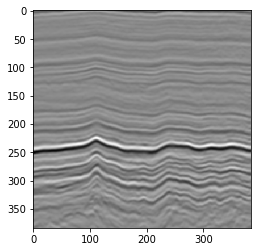

In [11]:
plt.imshow(x_images[894])
print(x_images[894].shape)

(384, 384)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


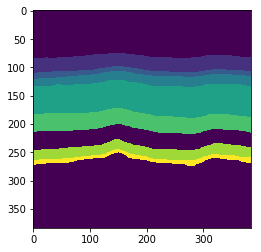

In [12]:
plt.imshow(y_images[895])
print(y_images[895].shape)
print(y_images[895])

In [122]:
dict_start = {}
dict_end = {}

for i in class_list:
    dict_start[i] = []
    dict_end[i] = []

for y_trr in y_images:
    for obj_class in class_list:
        for i in range(1,len(first_col)):
            if first_col[i]==obj_class and first_col[i-1] != obj_class:
                dict_start[obj_class].append(i)
            elif first_col[i-1]==obj_class and first_col[i] == obj_class:
                dict_end[obj_class].append(i)
                break
            

            
# print(dict_start[0].shape)           
            
# print(len(dict_start[2])) 
# print(np.array(dict_start[2]).shape)
# # plt.imshow(np.array(dict_start[1]))
# print(dict_start[2])            
# print(len(dict_end[1]))
# print(dict_end[1])
    

In [125]:
a = np.ones((384,384))
a.shape

(384, 384)

In [132]:
start = 0
end = 94
tclass = 1

a[start:end, 0]*tclass

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [174]:
a = np.ones((384,384))
print(list(dict_total.values()))
dict_list = list(dict_total.values())


for i, pix in enumerate(dict_total.values()):
    print(i+1, int(dict_list[i][0]))
    if i == 0:
        start = 0
        end = int(dict_list[i][0])
        tclass = i+1
    else:
        start = int(dict_list[i-1][0])
        end = int(dict_list[i][0])
        tclass = i+1
    
    print((a[start:end, :]*tclass))
    
    a[start:end, :] = a[start:end, :]*tclass
 
        
#     np.vstack((np.ones(384)*dict_total[1][0], np.ones(384)*dict_total[1][0]))

[[94.0, 95.0], [119.0, 120.0], [128.0, 129.0], [180.0, 181.0], [213.0, 214.0], [246.0, 247.0], [264.0, 265.0]]
1 94
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
2 119
[[2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]
 ...
 [2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]]
3 128
[[3. 3. 3. ... 3. 3. 3.]
 [3. 3. 3. ... 3. 3. 3.]
 [3. 3. 3. ... 3. 3. 3.]
 ...
 [3. 3. 3. ... 3. 3. 3.]
 [3. 3. 3. ... 3. 3. 3.]
 [3. 3. 3. ... 3. 3. 3.]]
4 180
[[4. 4. 4. ... 4. 4. 4.]
 [4. 4. 4. ... 4. 4. 4.]
 [4. 4. 4. ... 4. 4. 4.]
 ...
 [4. 4. 4. ... 4. 4. 4.]
 [4. 4. 4. ... 4. 4. 4.]
 [4. 4. 4. ... 4. 4. 4.]]
5 213
[[5. 5. 5. ... 5. 5. 5.]
 [5. 5. 5. ... 5. 5. 5.]
 [5. 5. 5. ... 5. 5. 5.]
 ...
 [5. 5. 5. ... 5. 5. 5.]
 [5. 5. 5. ... 5. 5. 5.]
 [5. 5. 5. ... 5. 5. 5.]]
6 246
[[6. 6. 6. ... 6. 6. 6.]
 [6. 6. 6. ... 6. 6. 6.]
 [6. 6. 6. ... 6. 6. 6.]

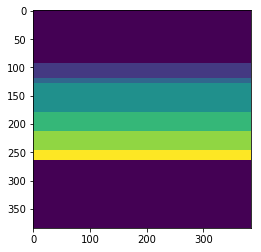

In [175]:
plt.imshow(a)

In [173]:
a[166:233, :]

array([[4., 4., 4., ..., 4., 4., 4.],
       [4., 4., 4., ..., 4., 4., 4.],
       [4., 4., 4., ..., 4., 4., 4.],
       ...,
       [6., 6., 6., ..., 6., 6., 6.],
       [6., 6., 6., ..., 6., 6., 6.],
       [6., 6., 6., ..., 6., 6., 6.]])

In [98]:
dict_total = {}
for obj_class in class_list:
    dict_total[obj_class] = [np.median(dict_start[obj_class]),
                            np.median(dict_end[obj_class])]
dict_total

{1: [94.0, 95.0],
 2: [119.0, 120.0],
 3: [128.0, 129.0],
 4: [180.0, 181.0],
 5: [213.0, 214.0],
 6: [246.0, 247.0],
 7: [264.0, 265.0]}

In [309]:
x_images1

In [310]:
type(x_images1)

NoneType

In [ ]:
for n, i in enumerate(train_dataset):
    if type(i)==str:
        pass
    else:
        if x_images1 is None:
            x_images1 = i['image'][:,:,:,None].astype(float)
            print(x_images1.shape)
        else:
            x_images1 = np.concatenate((x_images1,i['image'][:,:,:,None]), axis=3)
            

(384, 384, 3, 1)
(384, 384, 3, 1)
(384, 384, 3, 2)
(384, 384, 3, 1)
(384, 384, 3, 3)
(384, 384, 3, 1)
(384, 384, 3, 4)
(384, 384, 3, 1)
(384, 384, 3, 5)
(384, 384, 3, 1)
(384, 384, 3, 6)
(384, 384, 3, 1)
(384, 384, 3, 7)
(384, 384, 3, 1)
(384, 384, 3, 8)
(384, 384, 3, 1)
(384, 384, 3, 9)
(384, 384, 3, 1)
(384, 384, 3, 10)
(384, 384, 3, 1)
(384, 384, 3, 11)
(384, 384, 3, 1)
(384, 384, 3, 12)
(384, 384, 3, 1)
(384, 384, 3, 13)
(384, 384, 3, 1)
(384, 384, 3, 14)
(384, 384, 3, 1)
(384, 384, 3, 15)
(384, 384, 3, 1)
(384, 384, 3, 16)
(384, 384, 3, 1)
(384, 384, 3, 17)
(384, 384, 3, 1)
(384, 384, 3, 18)
(384, 384, 3, 1)
(384, 384, 3, 19)
(384, 384, 3, 1)
(384, 384, 3, 20)
(384, 384, 3, 1)
(384, 384, 3, 21)
(384, 384, 3, 1)
(384, 384, 3, 22)
(384, 384, 3, 1)
(384, 384, 3, 23)
(384, 384, 3, 1)
(384, 384, 3, 24)
(384, 384, 3, 1)
(384, 384, 3, 25)
(384, 384, 3, 1)
(384, 384, 3, 26)
(384, 384, 3, 1)
(384, 384, 3, 27)
(384, 384, 3, 1)
(384, 384, 3, 28)
(384, 384, 3, 1)
(384, 384, 3, 29)
(384, 384, 

(384, 384, 3, 232)
(384, 384, 3, 1)
(384, 384, 3, 233)
(384, 384, 3, 1)
(384, 384, 3, 234)
(384, 384, 3, 1)
(384, 384, 3, 235)
(384, 384, 3, 1)
(384, 384, 3, 236)
(384, 384, 3, 1)
(384, 384, 3, 237)
(384, 384, 3, 1)
(384, 384, 3, 238)
(384, 384, 3, 1)
(384, 384, 3, 239)
(384, 384, 3, 1)
(384, 384, 3, 240)
(384, 384, 3, 1)
(384, 384, 3, 241)
(384, 384, 3, 1)
(384, 384, 3, 242)
(384, 384, 3, 1)
(384, 384, 3, 243)
(384, 384, 3, 1)
(384, 384, 3, 244)
(384, 384, 3, 1)
(384, 384, 3, 245)
(384, 384, 3, 1)
(384, 384, 3, 246)
(384, 384, 3, 1)
(384, 384, 3, 247)
(384, 384, 3, 1)
(384, 384, 3, 248)
(384, 384, 3, 1)
(384, 384, 3, 249)
(384, 384, 3, 1)
(384, 384, 3, 250)
(384, 384, 3, 1)
(384, 384, 3, 251)
(384, 384, 3, 1)
(384, 384, 3, 252)
(384, 384, 3, 1)
(384, 384, 3, 253)
(384, 384, 3, 1)
(384, 384, 3, 254)
(384, 384, 3, 1)
(384, 384, 3, 255)
(384, 384, 3, 1)
(384, 384, 3, 256)
(384, 384, 3, 1)
(384, 384, 3, 257)
(384, 384, 3, 1)
(384, 384, 3, 258)
(384, 384, 3, 1)
(384, 384, 3, 259)
(384, 384

(384, 384, 3, 460)
(384, 384, 3, 1)
(384, 384, 3, 461)
(384, 384, 3, 1)
(384, 384, 3, 462)
(384, 384, 3, 1)
(384, 384, 3, 463)
(384, 384, 3, 1)
(384, 384, 3, 464)
(384, 384, 3, 1)
(384, 384, 3, 465)
(384, 384, 3, 1)
(384, 384, 3, 466)
(384, 384, 3, 1)
(384, 384, 3, 467)
(384, 384, 3, 1)
(384, 384, 3, 468)
(384, 384, 3, 1)
(384, 384, 3, 469)
(384, 384, 3, 1)
(384, 384, 3, 470)
(384, 384, 3, 1)
(384, 384, 3, 471)
(384, 384, 3, 1)
(384, 384, 3, 472)
(384, 384, 3, 1)
(384, 384, 3, 473)
(384, 384, 3, 1)
(384, 384, 3, 474)
(384, 384, 3, 1)
(384, 384, 3, 475)
(384, 384, 3, 1)
(384, 384, 3, 476)
(384, 384, 3, 1)
(384, 384, 3, 477)
(384, 384, 3, 1)
(384, 384, 3, 478)
(384, 384, 3, 1)
(384, 384, 3, 479)
(384, 384, 3, 1)
(384, 384, 3, 480)
(384, 384, 3, 1)
(384, 384, 3, 481)
(384, 384, 3, 1)
(384, 384, 3, 482)
(384, 384, 3, 1)
(384, 384, 3, 483)
(384, 384, 3, 1)
(384, 384, 3, 484)
(384, 384, 3, 1)
(384, 384, 3, 485)
(384, 384, 3, 1)
(384, 384, 3, 486)
(384, 384, 3, 1)
(384, 384, 3, 487)
(384, 384

(384, 384, 3, 688)
(384, 384, 3, 1)
(384, 384, 3, 689)
(384, 384, 3, 1)
(384, 384, 3, 690)
(384, 384, 3, 1)
(384, 384, 3, 691)
(384, 384, 3, 1)
(384, 384, 3, 692)
(384, 384, 3, 1)
(384, 384, 3, 693)
(384, 384, 3, 1)
(384, 384, 3, 694)
(384, 384, 3, 1)
(384, 384, 3, 695)
(384, 384, 3, 1)
(384, 384, 3, 696)
(384, 384, 3, 1)
(384, 384, 3, 697)
(384, 384, 3, 1)
(384, 384, 3, 698)
(384, 384, 3, 1)
(384, 384, 3, 699)
(384, 384, 3, 1)
(384, 384, 3, 700)
(384, 384, 3, 1)
(384, 384, 3, 701)
(384, 384, 3, 1)
(384, 384, 3, 702)
(384, 384, 3, 1)
(384, 384, 3, 703)
(384, 384, 3, 1)
(384, 384, 3, 704)
(384, 384, 3, 1)
(384, 384, 3, 705)
(384, 384, 3, 1)
(384, 384, 3, 706)
(384, 384, 3, 1)
(384, 384, 3, 707)
(384, 384, 3, 1)
(384, 384, 3, 708)
(384, 384, 3, 1)
(384, 384, 3, 709)
(384, 384, 3, 1)
(384, 384, 3, 710)
(384, 384, 3, 1)
(384, 384, 3, 711)
(384, 384, 3, 1)
(384, 384, 3, 712)
(384, 384, 3, 1)
(384, 384, 3, 713)
(384, 384, 3, 1)
(384, 384, 3, 714)
(384, 384, 3, 1)
(384, 384, 3, 715)
(384, 384

In [279]:
x_images1.shape

(384, 384, 1)

Ну что же, теперь пришло время к моделям!
Начнем с простой модельки - fully-convolution-net.

И да - архитектура на ваш вкус и цвет :)

Но прежде чем начинать, какие callback нам точно потребуются? (вне зависимости от архитектуры)

In [229]:
x_images[1]

array([[155., 155., 155., ..., 142., 143., 145.],
       [139., 139., 139., ..., 123., 124., 126.],
       [119., 119., 119., ..., 108., 109., 110.],
       ...,
       [127., 128., 129., ..., 133., 136., 138.],
       [126., 127., 127., ..., 127., 130., 131.],
       [126., 126., 126., ..., 124., 127., 129.]])

In [231]:
for i, j in enumerate(x_images):
    x_images[i] = np.expand_dims(x_images[i], axis=2)

In [233]:
for i, j in enumerate(y_images):
    y_images[i] = np.expand_dims(y_images[i], axis=2)

In [232]:
x_images[0].shape

(384, 384, 1)

In [234]:
y_images[0].shape

(384, 384, 1)

In [236]:
import keras.backend as K

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Activation
from tensorflow.keras.layers import UpSampling2D, BatchNormalization, concatenate

Using TensorFlow backend.


In [237]:
TARGET_WIDTH , TARGET_HEIGHT, IMG_CHANNELS = (384,384,1)

# Вход в сетку 
inputs = Input((TARGET_WIDTH , TARGET_HEIGHT, IMG_CHANNELS))

# 128
down1 = Conv2D(64, (3, 3), activation="relu", padding='same')(inputs)
down1 = BatchNormalization()(down1)
down1 = Conv2D(64, (3, 3), activation="relu", padding='same')(down1)
down1 = BatchNormalization()(down1)
down1_pool = MaxPooling2D((2, 2), strides=(2, 2))(down1)

# 64
down2 = Conv2D(128, (3, 3), activation="relu", padding='same')(down1_pool)
down2 = BatchNormalization()(down2)
down2 = Conv2D(128, (3, 3), activation="relu", padding='same')(down2)
down2 = BatchNormalization()(down2)
down2_pool = MaxPooling2D((2, 2), strides=(2, 2))(down2)

# 32
down3 = Conv2D(256, (3, 3), activation="relu", padding='same')(down2_pool)
down3 = BatchNormalization()(down3)
down3 = Conv2D(256, (3, 3), activation="relu", padding='same')(down3)
down3 = BatchNormalization()(down3)
down3_pool = MaxPooling2D((2, 2), strides=(2, 2))(down3)

# 16
down4 = Conv2D(512, (3, 3), activation="relu", padding='same')(down3_pool)
down4 = BatchNormalization()(down4)
down4 = Conv2D(512, (3, 3), activation="relu", padding='same')(down4)
down4 = BatchNormalization()(down4)
down4_pool = MaxPooling2D((2, 2), strides=(2, 2))(down4)

# 8
center = Conv2D(1024, (3, 3), activation="relu", padding='same')(down4_pool)
center = BatchNormalization()(center)
center = Conv2D(1024, (3, 3), activation="relu", padding='same')(center)
center = BatchNormalization()(center)

# center

up4 = UpSampling2D((2, 2))(center)
up4 = Conv2D(512, (3, 3), activation="relu", padding='same')(up4)
up4 = BatchNormalization()(up4)
up4 = Conv2D(512, (3, 3), activation="relu", padding='same')(up4)
up4 = BatchNormalization()(up4)
up4 = Conv2D(512, (3, 3), activation="relu", padding='same')(up4)
up4 = BatchNormalization()(up4)

# 16
up3 = UpSampling2D((2, 2))(up4)
up3 = Conv2D(256, (3, 3), activation="relu", padding='same')(up3)
up3 = BatchNormalization()(up3)
up3 = Conv2D(256, (3, 3), activation="relu",  padding='same')(up3)
up3 = BatchNormalization()(up3)
up3 = Conv2D(256, (3, 3), activation="relu", padding='same')(up3)
up3 = BatchNormalization()(up3)

# 32
up2 = UpSampling2D((2, 2))(up3)
up2 = Conv2D(128, (3, 3), activation="relu", padding='same')(up2)
up2 = BatchNormalization()(up2)
up2 = Conv2D(128, (3, 3), activation="relu", padding='same')(up2)
up2 = BatchNormalization()(up2)
up2 = Conv2D(128, (3, 3), activation="relu", padding='same')(up2)
up2 = BatchNormalization()(up2)

# 64
up1 = UpSampling2D((2, 2))(up2)
up1 = Conv2D(64, (3, 3), activation="relu", padding='same')(up1)
up1 = BatchNormalization()(up1)
up1 = Conv2D(64, (3, 3), activation="relu", padding='same')(up1)
up1 = BatchNormalization()(up1)
up1 = Conv2D(64, (3, 3), activation="relu", padding='same')(up1)
up1 = BatchNormalization()(up1)

# 128
outputs = Conv2D(7, (1, 1), activation='sigmoid')(up1)
model_fully = Model(inputs=inputs, outputs=outputs)

In [238]:
model_fully.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 384, 384, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 384, 384, 64)      640       
_________________________________________________________________
batch_normalization (BatchNo (None, 384, 384, 64)      256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 384, 384, 64)      36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 384, 384, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 192, 192, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 192, 192, 128)     73856 

In [240]:
optimizer = tf.optimizers.Adam()

model_fully.compile(
    optimizer=optimizer, 
    loss="categorical_crossentropy", 
    metrics=["accuracy"]
)

In [241]:
history = model_fully.fit(x_images, y_images,
                    batch_size=32,
                    epochs=1,
                    validation_split=0.1
                   )

ValueError: Error when checking input: expected input_1 to have 4 dimensions, but got array with shape (384, 384, 1)

Собираем u-net. Смотрим как оно :)

In [ ]:
# Собираем fully-convolution-net

Ну чтож, время вашего творчества - меняем архитектуры, смотрим и вспоминаем, что же ещё мы не учли и что может нам помочь. Да и вообще -какие подходы ещё не использованы !

In [ ]:
### играемся на все деньги

И доп задачка для всех - а что если обучить часть (или весь) unet как автоэнкодер.....


In [ ]:
##############################